<a href="https://colab.research.google.com/github/shearere2/vcu_reu/blob/main/FactorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=b8609ed4db4561ecde736f903f8755d1a8c4468d03b16aa27d0a105aab47e92b
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [83]:
import factor_analyzer
import pandas as pd
import numpy as np
import seaborn as sns

In [84]:
df = pd.read_csv('StudentData_granular.csv').set_index('record_id')

Data Preprocessing - In order to perform exploratory factor analysis, we must make sure all data preprocessed.  This includes removing NaNs, converting all information to model readable numeric, etc.

In [85]:
# Create parents on a 0 to 1 scale (0 for no parents, .5 for 1 parent, 1 for 2 parents)

arr = np.array([])
for index, row in df.iterrows():
  if not row['has_mother'] and not row['has_father']:
    arr = np.append(arr, 0)
  elif not row['has_mother'] and row['has_father']:
    arr = np.append(arr, .5)
  elif not row['has_father'] and row['has_mother']:
    arr = np.append(arr, .5)
  else:
    arr = np.append(arr, 1)
df['parents_scaled'] = arr

In [86]:
# gpa, currently a categorical variable, must be converted to continuous

def continuous_grades(c):
  if range == '3.51-4.0': return 4.0
  elif range == '3.01-3.5': return 3.5
  elif range == '2.51-3.0': return 3.0
  elif range == 'Below 2.5': return 2.5
  else: return 2.0

df['gpa'] = df['gpa'].apply(continuous_grades)

In [87]:
# Now the dataframe only holds continuous data

df = df.select_dtypes(include=['int', 'float']).fillna(0.0).astype('float')

In [ ]:
for i in df.columns: print(i)

In [89]:
cols = ['age', 'year', 'gpa', 'acpers', 'colearn', 'hours', 'covid_mh',
        'covid_edu', 'covid_iso', 'ptsd_score', 'trauma_sum',
        'anxiety', 'stress', 'depress', 'mh_scale', 'ss_friend',
        'ss_family', 'racial_diversity', 'racial_similarity',
        'parents_scaled', 'eduhelp.mean', 'emohelp.mean']
df = df[cols]

In [90]:
# Clean dataset, all numeric.  This dataset is ready for factor analysis.
df

,age,year,gpa,acpers,colearn,hours,covid_mh,covid_edu,covid_iso,ptsd_score,...,stress,depress,mh_scale,ss_friend,ss_family,racial_diversity,racial_similarity,parents_scaled,eduhelp.mean,emohelp.mean
record_id,,,,,,,,,,,,,,,,,,,,,
2,29.0,2017.0,2.0,5.666667,2.00,40.0,9.0,5.0,7.0,15.0,...,1.142857,0.714286,0.809524,4.666667,5.50,0.111111,1.000000,1.0,5.6,7.8
3,53.0,2016.0,2.0,5.333333,2.50,40.0,3.0,1.0,2.0,3.0,...,0.285714,0.000000,0.095238,5.666667,5.50,0.222222,0.500000,0.5,0.0,8.0
4,46.0,2019.0,2.0,5.833333,3.00,40.0,7.0,7.0,2.0,0.0,...,0.285714,0.571429,0.285714,5.666667,5.50,0.111111,0.000000,1.0,3.6,9.6
5,30.0,2018.0,2.0,3.500000,3.00,20.0,10.0,8.0,5.0,15.0,...,0.857143,0.714286,0.666667,5.666667,5.50,0.111111,1.000000,1.0,4.0,6.5
6,29.0,2019.0,2.0,5.000000,1.75,0.0,7.0,2.0,6.0,8.0,...,0.285714,0.428571,0.238095,5.333333,3.75,0.111111,0.000000,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,49.0,2018.0,2.0,5.666667,2.25,15.0,10.0,10.0,10.0,63.0,...,2.142857,2.285714,2.095238,2.000000,1.25,0.111111,1.000000,0.5,0.0,0.0
481,21.0,2018.0,2.0,5.000000,3.00,0.0,4.0,6.0,7.0,1.0,...,0.000000,0.000000,0.095238,4.666667,3.00,0.222222,0.800000,0.0,0.0,6.8
482,20.0,2018.0,2.0,4.833333,2.25,10.0,5.0,10.0,4.0,2.0,...,1.142857,1.000000,0.952381,5.000000,5.50,0.111111,1.000000,1.0,4.0,6.0


Factor Analysis first visualization

In [91]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [92]:
X = StandardScaler().fit_transform(df)

In [93]:
# For now, using 10 factors.
factors = 10

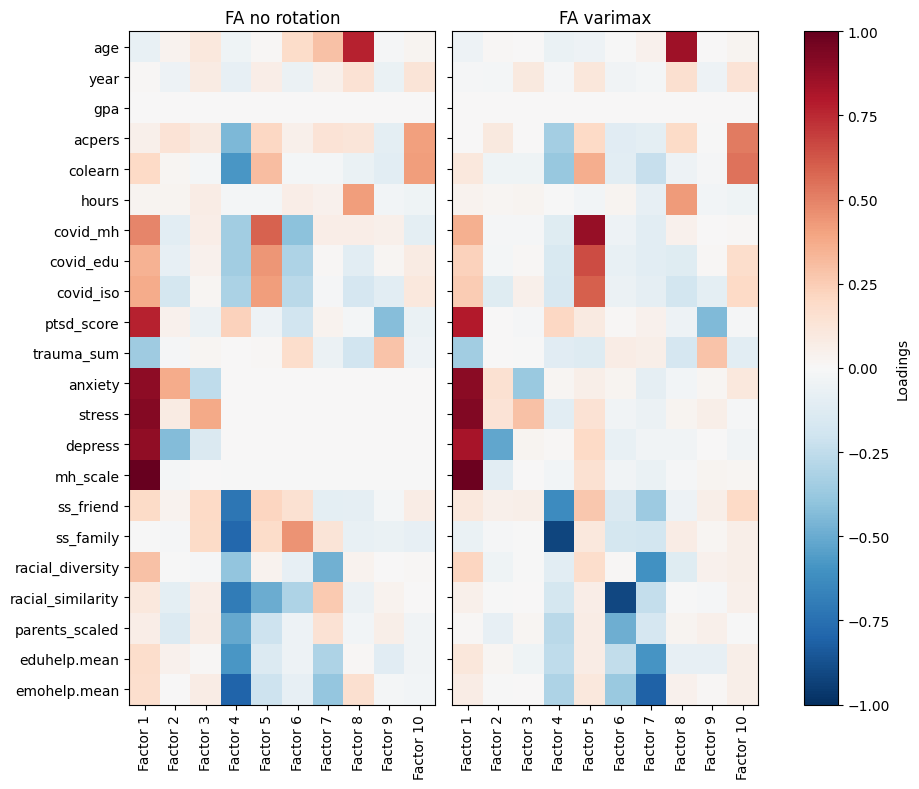

In [119]:
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation = "varimax")),
]

# Subplots on one canvas
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

# This for loop is what makes two seperate plots
for ax, (title, fa) in zip(axes, fas):
    fa = fa.fit(X)
    # We transpose the components
    factor_matrix = fa.components_.T
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    # Code to add numbers to matrices
    # for (i,j), z in np.ndenumerate(factor_matrix):
    #     ax.text(j, i, str(z.round(2)), ha="center", va="center")

    ax.set_yticks(np.arange(len(df.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(df.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax.set_xticklabels([f"Factor {x}" for x in range(1,11)])
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()

# Adds a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="Loadings")
plt.show()

Factor analysis

In [121]:
X = StandardScaler().fit_transform(df)
fa = FactorAnalysis(n_components = 10, rotation = "varimax")

In [126]:
fa = fa.fit(X)

In [131]:
factors = ["Factor 1", "Factor 2", "Factor 3", "Factor 4",
           "Factor 5", "Factor 6", "Factor 7", "Factor 8",
           "Factor 9", "Factor 10"]

In [128]:
fa.components_.T

array([[-5.13308477e-02,  8.56163139e-03,  3.16757658e-03,
        -6.97501359e-02, -5.26876046e-02, -3.39500171e-03,
         4.11105259e-02,  8.50088953e-01,  4.02297041e-03,
         2.80196279e-02],
       [-8.12155920e-03, -1.86062979e-02,  9.68020160e-02,
        -1.30185998e-02,  1.11090539e-01, -3.68923220e-02,
        -2.31708920e-02,  1.57525432e-01, -4.94588374e-02,
         1.34219907e-01],
       [-4.67649255e-24,  2.03562415e-23, -1.58085537e-23,
         1.17022329e-23,  4.11739470e-23, -1.39140595e-22,
         7.39082243e-23,  2.99420714e-24,  2.45872669e-23,
         2.63763035e-23],
       [ 3.68484239e-03,  9.63067714e-02,  1.74884627e-03,
        -3.40252619e-01,  2.00621720e-01, -1.11594759e-01,
        -9.60727714e-02,  1.88824834e-01, -1.89847504e-03,
         5.16416765e-01],
       [ 1.02910323e-01, -4.26493253e-02, -4.20289105e-02,
        -3.81382167e-01,  3.63050643e-01, -1.08412548e-01,
        -2.30895324e-01, -4.85473148e-02, -1.14087542e-02,
         5.

In [132]:
matrix = pd.DataFrame(columns=factors, data=fa.components_.T, index=df.columns)

In [ ]:
matrix